<a href="https://colab.research.google.com/github/Elvis-Onyango/Ai-health-prediction/blob/main/neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Inputs
X = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]], requires_grad=False)

# Targets
y = torch.tensor([[0.0],
                  [1.0],
                  [1.0],
                  [0.0]], requires_grad=False)

In [ ]:
# Define the neural network structure
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        # Hidden layer with ReLU activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Output layer with Sigmoid activation
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation after first layer
        x = torch.sigmoid(self.fc2(x))  # Sigmoid activation after second layer
        return x

In [ ]:
model = NeuralNet(input_size=2, hidden_size=5, output_size=1)
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [ ]:
# Training loop
losses = []
for epoch in range(10000):
    # Forward pass: compute predicted y by passing x to the model
    outputs = model(X)

    # Compute the loss
    loss = criterion(outputs, y)
    losses.append(loss.item())

    #compute gradients
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Backpropagation

    # Update weights
    optimizer.step()

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss.item():.4f}")

Epoch 0 - Loss: 0.7309
Epoch 1000 - Loss: 0.0002
Epoch 2000 - Loss: 0.0001
Epoch 3000 - Loss: 0.0000
Epoch 4000 - Loss: 0.0000
Epoch 5000 - Loss: 0.0000
Epoch 6000 - Loss: 0.0000
Epoch 7000 - Loss: 0.0000
Epoch 8000 - Loss: 0.0000
Epoch 9000 - Loss: 0.0000


In [ ]:
# Test the model
with torch.no_grad():  # No need to track gradients during testing
    predictions = model(X)
    print("\nPredictions:")
    print(predictions.round())  # round predictions to get binary output


Predictions:
tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [ ]:
# Normalize losses using min-max scaling (range 0 to 1)
min_loss = min(losses)
max_loss = max(losses)
normalized_losses = [(l - min_loss) / (max_loss - min_loss) for l in losses]


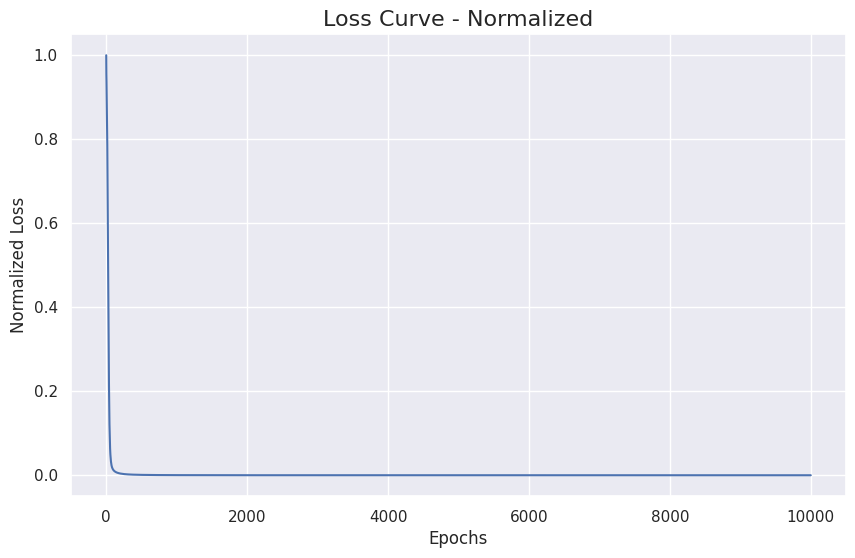

In [ ]:
# Plot the normalized loss values over epochs
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(x=range(len(normalized_losses)), y=normalized_losses)
plt.title('Loss Curve - Normalized', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Normalized Loss', fontsize=12)
plt.show()